In [ ]:
##2010 Traffic Collisions

In [35]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import plotly.express as px
from sodapy import Socrata
import requests

In [36]:
gdf = gpd.read_file('night.csv')

In [37]:
gdf['lat']=gdf['Location'].str.extract(r'\((.*),.*\)')
gdf['long']=gdf['Location'].str.extract(r'\(.*,(.*)\)')
gdf.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified),geometry,lat,long
0,191818769,09/01/2019,09/01/2019,0005,18,Southeast,1802,997,TRAFFIC COLLISION,1501 3036 3004 3026 3029 3101 4018,...,"(33.9601, -118.2782)",22352,795,1002,7,13,45,None,33.9601,-118.2782
1,190122125,09/02/2019,09/02/2019,0005,01,Central,0195,997,TRAFFIC COLLISION,3101 3401 3701 3004 3025 3029,...,"(34.0306, -118.2635)",23076,694,1220,7,13,76,None,34.0306,-118.2635
2,190512469,07/11/2019,07/11/2019,0005,05,Harbor,0529,997,TRAFFIC COLLISION,3037 3004 3028 3030 3101 4005 0605,...,"(33.7792, -118.2506)",3350,963,807,,15,15,None,33.7792,-118.2506
3,191415790,07/10/2019,07/07/2019,0005,14,Pacific,1497,997,TRAFFIC COLLISION,3004 3028 3030 3035 3037 3101 3401 3701 4027,...,"(33.9455, -118.3785)",23676,,445,10,10,16,None,33.9455,-118.3785
4,190615556,07/14/2019,07/14/2019,0005,06,Hollywood,0646,997,TRAFFIC COLLISION,3006 3028 3030 3035 3037 3101 3401 3701 4006,...,"(34.098, -118.338)",23446,422,468,,8,34,None,34.098,-118.338


In [38]:
gdf = gpd.GeoDataFrame(gdf, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(gdf.long, gdf.lat))

In [39]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

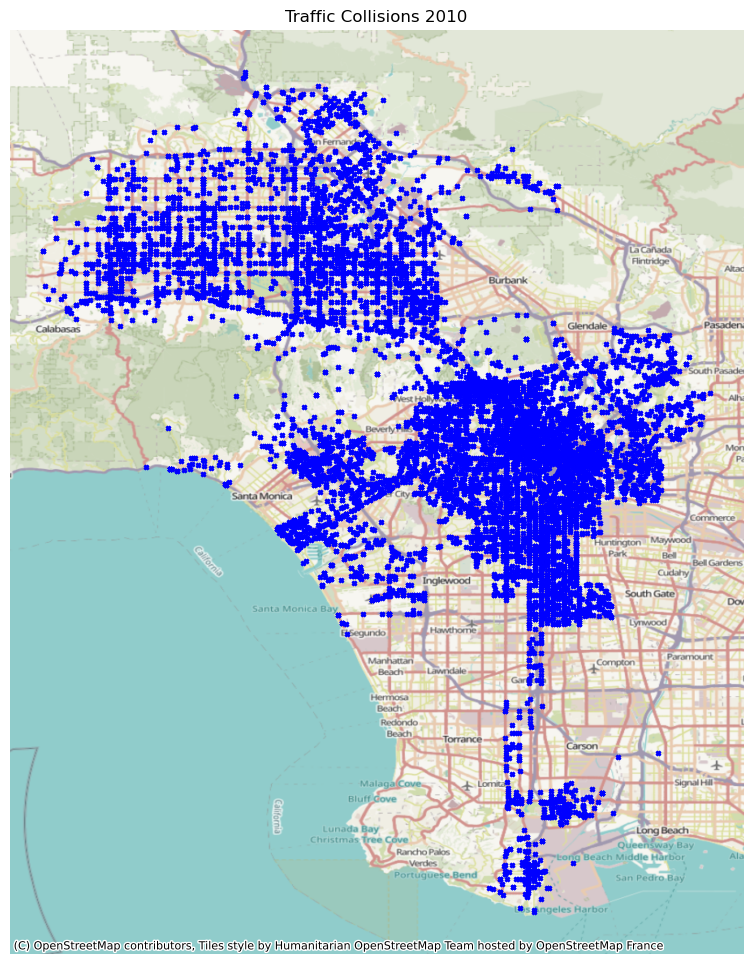

In [40]:
fig, ax = plt.subplots(figsize=(12,12))

ax = gdf.clip([-189,18,-66,71]).plot(ax=ax, 
        marker='X',
        markersize=10,
        color='blue')

ax.axis('off')

ax.set_title('Traffic Collisions 2010')

ctx.add_basemap(ax, crs=4326)

In [41]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9887 entries, 0 to 9886
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   DR Number                          9887 non-null   object  
 1   Date Reported                      9887 non-null   object  
 2   Date Occurred                      9887 non-null   object  
 3   Time Occurred                      9887 non-null   object  
 4   Area ID                            9887 non-null   object  
 5   Area Name                          9887 non-null   object  
 6   Reporting District                 9887 non-null   object  
 7   Crime Code                         9887 non-null   object  
 8   Crime Code Description             9887 non-null   object  
 9   MO Codes                           9887 non-null   object  
 10  Victim Age                         9887 non-null   object  
 11  Victim Sex                         

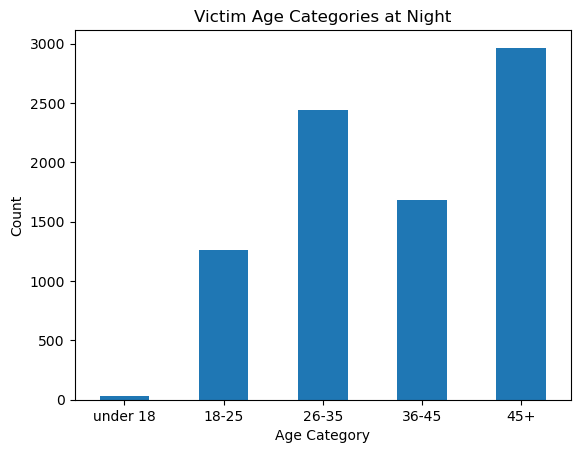

In [42]:
import pandas as pd


gdf['Victim Age'] = pd.to_numeric(gdf['Victim Age'], errors='coerce')


gdf = gdf.dropna(subset=['Victim Age'])




gdf['age_by_cat'] = pd.cut(gdf['Victim Age'], bins=[0, 18, 25, 35, 45, float('inf')], labels=['under 18', '18-25', '26-35', '36-45', '45+'], right=False, include_lowest=True)

gdf['age_by_cat'].value_counts().sort_index().plot(kind='bar', rot=0)
plt.title('Victim Age Categories at Night')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()


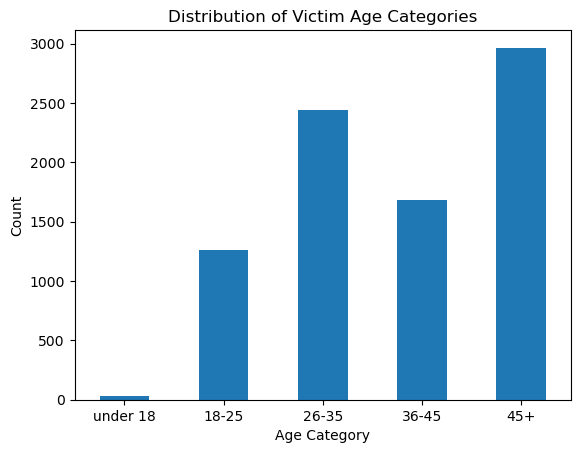

In [43]:

gdf['Time Occurred'] = pd.to_numeric(gdf['Victim Age'], errors='coerce')


gdf = gdf.dropna(subset=['Victim Age'])



gdf['age_by_cat'] = pd.cut(gdf['Victim Age'], bins=[0, 18, 25, 35, 45, float('inf')], labels=['under 18', '18-25', '26-35', '36-45', '45+'], right=False, include_lowest=True)

gdf['age_by_cat'].value_counts().sort_index().plot(kind='bar', rot=0)
plt.title('Distribution of Victim Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

In [44]:
gdf.age_by_cat.count()

8386

In [45]:
Area = ["West LA","Hollywood","Central", "Van Nuys","Harbor" ]

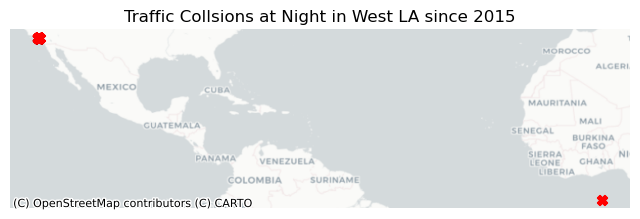

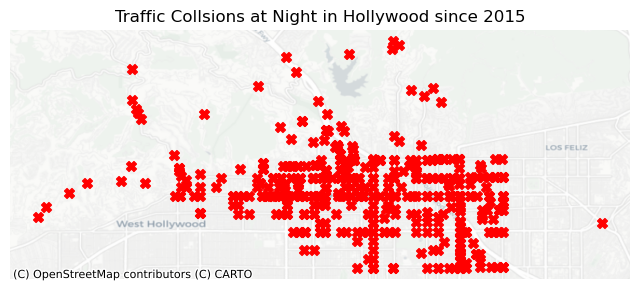

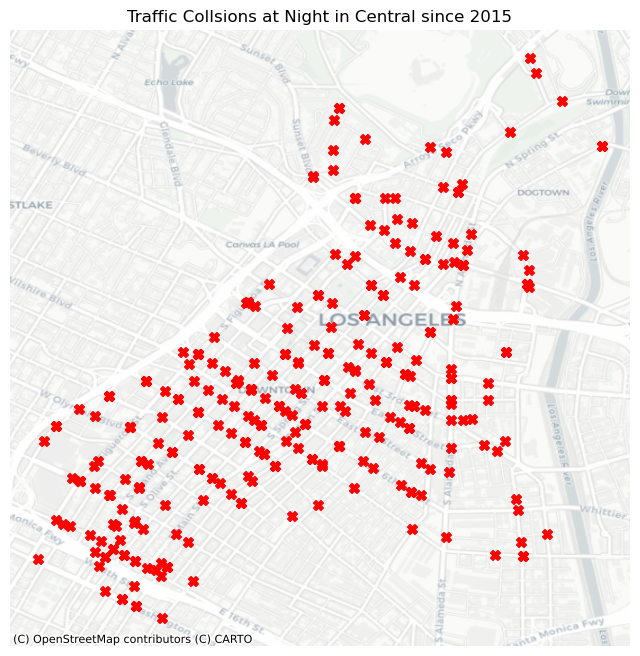

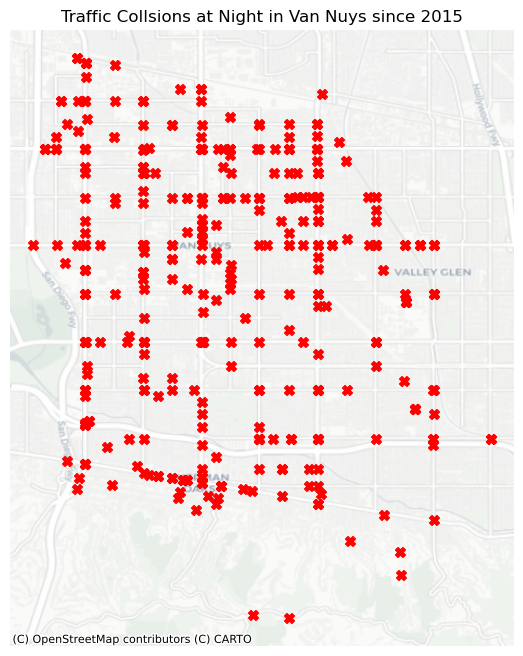

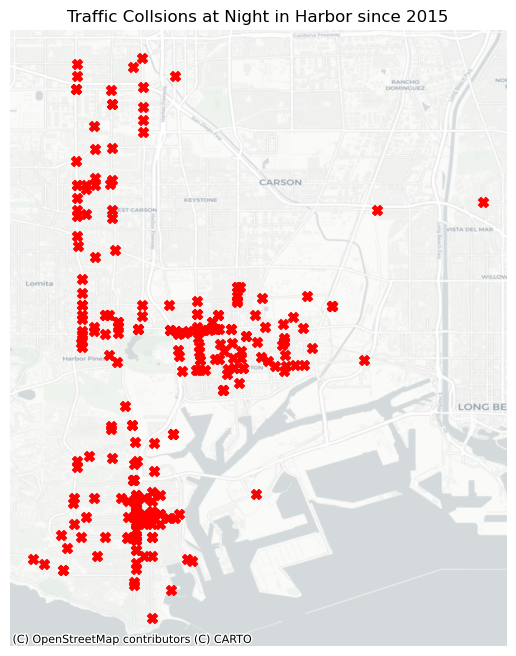

In [46]:

for city in Area:

  
    fig, ax = plt.subplots(figsize=(8,8))

    gdf[gdf['Area Name'] == city].plot(ax=ax, 
                          marker='X',
                          markersize=50,
                          color='red')

    ax.axis('off')
  
    ax.set_title('Traffic Collsions at Night in '+str(city) + ' since 2015')

    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=4326)

Unique values in 'month_by_cat': ['Sep-Dec', 'May-Aug', NaN, 'Jan-Apr']
Categories (3, object): ['Jan-Apr' < 'May-Aug' < 'Sep-Dec']
Counts of each category: month_by_cat
Jan-Apr    2113
May-Aug    2655
Sep-Dec    2813
Name: count, dtype: int64


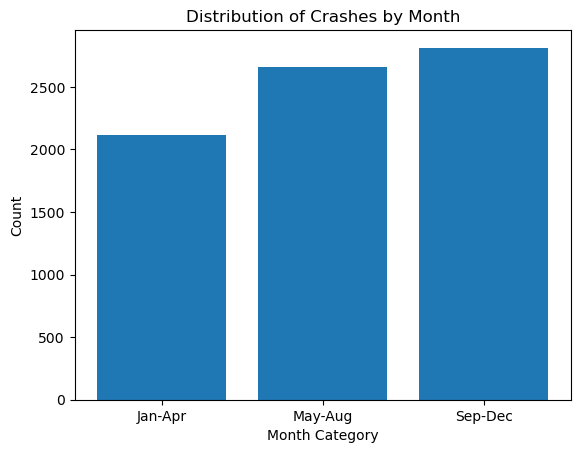

In [47]:
import pandas as pd
import matplotlib.pyplot as plt


gdf['Date Occurred'] = pd.to_datetime(gdf['Date Occurred'], format='%m/%d/%Y', errors='coerce')

gdf = gdf.dropna(subset=['Date Occurred'])

gdf['month_by_cat'] = pd.cut(
    gdf['Date Occurred'].dt.month,
    bins=[0, 4, 8, 12],  
    labels=['Jan-Apr', 'May-Aug', 'Sep-Dec'],
    right=False,
    include_lowest=True
)


print("Unique values in 'month_by_cat':", gdf['month_by_cat'].unique())
print("Counts of each category:", gdf['month_by_cat'].value_counts().sort_index())

plt.bar(gdf['month_by_cat'].value_counts().sort_index().index, gdf['month_by_cat'].value_counts().sort_index())
plt.title('Distribution of Crashes by Month')
plt.xlabel('Month Category')
plt.ylabel('Count')
plt.show()


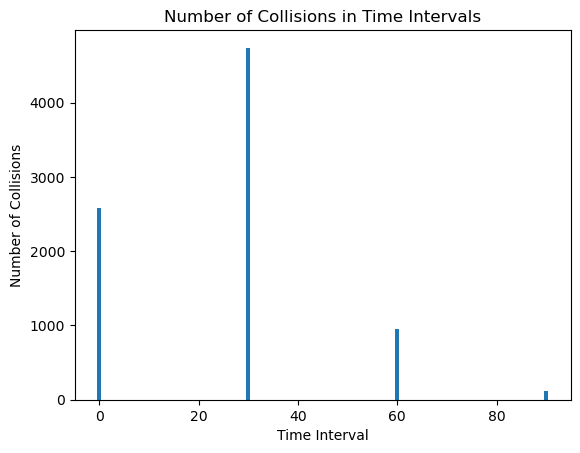

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

gdf['Time Occurred'] = pd.to_numeric(gdf['Time Occurred'], errors='coerce')

gdf = gdf.dropna(subset=['Time Occurred'])

interval_size = 30
gdf['Time Interval'] = (gdf['Time Occurred'] // interval_size) * interval_size

plt.bar(gdf['Time Interval'].value_counts().sort_index().index, gdf['Time Interval'].value_counts().sort_index())
plt.title('Number of Collisions in Time Intervals')
plt.xlabel('Time Interval')
plt.ylabel('Number of Collisions')
plt.show()
